<a href="https://colab.research.google.com/github/amuhasri/repo/blob/main/Telco_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Necessary Library

In [438]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [439]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## Load Data

In [440]:
df = pd.read_csv('/content/telecom_customer_churn.csv',index_col='Customer ID')
df.head()

,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
Customer ID,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [441]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Married                            7043 non-null   object 
 3   Number of Dependents               7043 non-null   int64  
 4   City                               7043 non-null   object 
 5   Zip Code                           7043 non-null   int64  
 6   Latitude                           7043 non-null   float64
 7   Longitude                          7043 non-null   float64
 8   Number of Referrals                7043 non-null   int64  
 9   Tenure in Months                   7043 non-null   int64  
 10  Offer                              7043 non-null   object 
 11  Phone Service                      7043 non-nu

We want to Drop Unneeded & Redundant Tables

- 'Zip Code','Latitude','Longitude' (represented with 'city')
- 'Internet Service' because in Internet Type we can identify which customer is using the services or not in 'Internet Type'
- 'Avg Monthly Long Distance Charges' it count avg charge, it represent from 'Monthly Charge' & 'Total Charge'
- 'Phone Service' we can identify which customer is using the services or not in 'Multiple Lines'
- 'Paperless Billing' the data do not represent customer action
- 'Total Revenue' it is not customer information
- 'Churn Category' & 'Churn Reason' we not using those columns, in this analysis aim to create model to calculate Churn, not reason behide it

But before that lets we check/drop/fill nan value on table

In [442]:
#Dropping some columns, but we run it after data cleaning
# df1 = df.drop(columns=['Zip Code','Latitude','Longitude','Internet Service','Avg Monthly Long Distance Charges',
#         'Phone Service','Paperless Billing','Total Revenue','Churn Category', 'Churn Reason']
#         ,inplace=True)

In [443]:
selected_columns= ['Multiple Lines',
'Internet Type',
'Avg Monthly GB Download',
'Online Security',
'Online Backup',
'Device Protection Plan',
'Premium Tech Support',
'Streaming TV',
'Streaming Movies',
'Streaming Music',
'Unlimited Data']

unique_counts_selected = df[selected_columns].nunique()
unique_counts_selected

Multiple Lines              2
Internet Type               3
Avg Monthly GB Download    49
Online Security             2
Online Backup               2
Device Protection Plan      2
Premium Tech Support        2
Streaming TV                2
Streaming Movies            2
Streaming Music             2
Unlimited Data              2
dtype: int64

## Customer Status
Customer status have 3 categories type of customers, there are Churned, stayed, and join
in this analysis, we want to create the new customer as prediction, will they be loyal/stayed or churning.

## DATA CLEANING

### 1. Data cleaning and preprocessing (Multiple Lines)



In [444]:
# Fill 'Multiple Lines'
# to make this function, i go back to the first  table (before drop), but to make easiier on reading, I put it here
def update_multiple_lines(row):
    if row['Phone Service'] == 'No':
        return 'No'
    else:
        return row['Multiple Lines']
df['Multiple Lines'] = df.apply(update_multiple_lines, axis=1)
df['Multiple Lines'].info()

<class 'pandas.core.series.Series'>
Index: 7043 entries, 0002-ORFBO to 9995-HOTOH
Series name: Multiple Lines
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 110.0+ KB


In [445]:
df['Multiple Lines'].unique()

array(['No', 'Yes'], dtype=object)

### 2. Data cleaning and preprocessing (Internet Type) BELUM SELESAI

In [446]:
# Fill 'Internet Type'
# to make this function, i go back to the first  table (before drop), but to make easiier on reading, I put it here
def update_InternetType_lines(row):
    if row['Phone Service'] == "No":
        return 'No Internet Type'
    else:
        return row['Internet Type']
df['Internet Type'] = df.apply(update_InternetType_lines, axis=1)
df['Internet Type'].info()

<class 'pandas.core.series.Series'>
Index: 7043 entries, 0002-ORFBO to 9995-HOTOH
Series name: Internet Type
Non-Null Count  Dtype 
--------------  ----- 
5517 non-null   object
dtypes: object(1)
memory usage: 110.0+ KB


In [447]:
df['Internet Type'].value_counts()

Fiber Optic         3035
DSL                 1199
No Internet Type     682
Cable                601
Name: Internet Type, dtype: int64

In [448]:
df['Internet Type'].isna().sum()

1526

In [449]:
# FIll Nan, Fill with random value but dominant in Optic fiber base on value at diagram above
random_value = ['Fiber Optic', 'DSL', 'Cable']
dominant_value = 'Fiber Optic'
# df['Internet Type'] = df['Internet Type'].apply(lambda x: np.random.choice(['Fiber Optic', 'DSL', 'Cable']) if pd.isna(x))

In [450]:
df['Internet Type'].fillna(dominant_value, inplace=True)

In [451]:
df['Internet Type'].value_counts()

Fiber Optic         4561
DSL                 1199
No Internet Type     682
Cable                601
Name: Internet Type, dtype: int64

In [452]:
df['Internet Type'].isna().sum()

0

### 3. Data cleaning and preprocessing (Avg Monthly GB Download )

In [453]:
# Fill 'Avg Monthly GB Download'
# to make this function, i go back to the first  table (before drop), but to make easiier on reading, I put it here
def update_MonthlyDownload_lines(row):
    if row['Internet Service'] == "No":
        return '0'
    else:
        return row['Avg Monthly GB Download']
df['Avg Monthly GB Download'] = df.apply(update_MonthlyDownload_lines, axis=1)
df['Avg Monthly GB Download'].info()

<class 'pandas.core.series.Series'>
Index: 7043 entries, 0002-ORFBO to 9995-HOTOH
Series name: Avg Monthly GB Download
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 110.0+ KB


In [454]:
df['Avg Monthly GB Download'].isna().sum()

0

Done, 0 nan value in Avg Monthly GB Download

### 4. Data cleaning and preprocessing (Online Security)

In [455]:
# Fill 'Online Security'
# to make this function, i go back to the first  table (before drop), but to make easiier on reading, I put it here
def update_OnlineSecurity_lines(row):
    if row['Internet Service'] == "No":
        return 'No'
    else:
        return row['Online Security']
df['Online Security'] = df.apply(update_OnlineSecurity_lines, axis=1)
df['Online Security'].info()

<class 'pandas.core.series.Series'>
Index: 7043 entries, 0002-ORFBO to 9995-HOTOH
Series name: Online Security
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 110.0+ KB


In [456]:
df['Online Security'].isna().sum()

0

### 5. Data cleaning and preprocessing (Online Backup)

In [457]:
# Fill 'Online Backup'
# to make this function, i go back to the first  table (before drop), but to make easiier on reading, I put it here
def update_OnlineBackup_lines(row):
    if row['Internet Service'] == "No":
        return 'No'
    else:
        return row['Online Backup']
df['Online Backup'] = df.apply(update_OnlineBackup_lines, axis=1)
df['Online Backup'].info()

<class 'pandas.core.series.Series'>
Index: 7043 entries, 0002-ORFBO to 9995-HOTOH
Series name: Online Backup
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 110.0+ KB


In [458]:
df['Online Backup'].isna().sum()

0

### 6. Data cleaning and preprocessing (Device Protection Plan)

In [459]:
# Fill 'Device Protection Plan'
# to make this function, i go back to the first  table (before drop), but to make easiier on reading, I put it here
def update_Protection_Plan_lines(row):
    if row['Internet Service'] == "No":
        return 'No'
    else:
        return row['Device Protection Plan']
df['Device Protection Plan'] = df.apply(update_Protection_Plan_lines, axis=1)
df['Device Protection Plan'].info()

<class 'pandas.core.series.Series'>
Index: 7043 entries, 0002-ORFBO to 9995-HOTOH
Series name: Device Protection Plan
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 110.0+ KB


In [460]:
df['Device Protection Plan'].isna().sum()

0

### 7. Data cleaning and preprocessing (Premium Tech Support)

In [461]:
# Fill 'Premium Tech Support'
# to make this function, i go back to the first  table (before drop), but to make easiier on reading, I put it here
def update_TechSupport_Plan_lines(row):
    if row['Internet Service'] == "No":
        return 'No'
    else:
        return row['Premium Tech Support']
df['Premium Tech Support'] = df.apply(update_TechSupport_Plan_lines, axis=1)
df['Premium Tech Support'].info()

<class 'pandas.core.series.Series'>
Index: 7043 entries, 0002-ORFBO to 9995-HOTOH
Series name: Premium Tech Support
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 110.0+ KB


In [462]:
df['Premium Tech Support'].isna().sum()

0

### 8. Data cleaning and preprocessing (Streaming TV  )

In [463]:
# Fill 'Streaming TV'
# to make this function, i go back to the first  table (before drop), but to make easiier on reading, I put it here
def update_StreamingTV_Plan_lines(row):
    if row['Internet Service'] == "No":
        return 'No'
    else:
        return row['Streaming TV']
df['Streaming TV'] = df.apply(update_StreamingTV_Plan_lines, axis=1)
df['Streaming TV'].info()

<class 'pandas.core.series.Series'>
Index: 7043 entries, 0002-ORFBO to 9995-HOTOH
Series name: Streaming TV
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 110.0+ KB


In [464]:
df['Streaming TV'].isna().sum()

0

### 9. Data cleaning and preprocessing (Streaming Movies)

In [465]:
# Fill 'Streaming Movies'
# to make this function, i go back to the first  table (before drop), but to make easiier on reading, I put it here
def update_StreamingMovie_Plan_lines(row):
    if row['Internet Service'] == "No":
        return 'No'
    else:
        return row['Streaming Movies']
df['Streaming Movies'] = df.apply(update_StreamingMovie_Plan_lines, axis=1)
df['Streaming Movies'].info()

<class 'pandas.core.series.Series'>
Index: 7043 entries, 0002-ORFBO to 9995-HOTOH
Series name: Streaming Movies
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 110.0+ KB


In [466]:
df['Streaming Movies'].isna().sum()

0

### 10. Data cleaning and preprocessing (Streaming Music)

In [467]:
# Fill 'Streaming Music'
# to make this function, i go back to the first  table (before drop), but to make easiier on reading, I put it here
def update_StreamingMucis_Plan_lines(row):
    if row['Internet Service'] == "No":
        return 'No'
    else:
        return row['Streaming Music']
df['Streaming Music'] = df.apply(update_StreamingMucis_Plan_lines, axis=1)
df['Streaming Music'].info()

<class 'pandas.core.series.Series'>
Index: 7043 entries, 0002-ORFBO to 9995-HOTOH
Series name: Streaming Music
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 110.0+ KB


In [468]:
df['Streaming Music'].isna().sum()

0

### 11. Data cleaning and preprocessing (Unlimited Data)

In [469]:
# Fill 'Unlimited Data'
# to make this function, i go back to the first  table (before drop), but to make easiier on reading, I put it here
def update_UnlimitedData_Plan_lines(row):
    if row['Internet Service'] == "No":
        return 'No'
    else:
        return row['Unlimited Data']
df['Unlimited Data'] = df.apply(update_UnlimitedData_Plan_lines, axis=1)
df['Unlimited Data'].info()

<class 'pandas.core.series.Series'>
Index: 7043 entries, 0002-ORFBO to 9995-HOTOH
Series name: Unlimited Data
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 110.0+ KB


In [470]:
df['Unlimited Data'].isna().sum()

0

## Sperate "join" Customer Category Type

In [471]:
df.drop(columns=['Zip Code','Latitude','Longitude','Internet Service','Avg Monthly Long Distance Charges',
        'Phone Service','Paperless Billing','Total Revenue','Churn Category', 'Churn Reason']
        ,inplace=True)

In [472]:
joined_rows = df[df['Customer Status'] == 'Joined']

In [473]:
df1 = df[df['Customer Status'] != 'Joined']
df1.reset_index(drop=True, inplace=True)
df = df1

In [474]:
joined_rows.info()

<class 'pandas.core.frame.DataFrame'>
Index: 454 entries, 0021-IKXGC to 9992-UJOEL
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       454 non-null    object 
 1   Age                          454 non-null    int64  
 2   Married                      454 non-null    object 
 3   Number of Dependents         454 non-null    int64  
 4   City                         454 non-null    object 
 5   Number of Referrals          454 non-null    int64  
 6   Tenure in Months             454 non-null    int64  
 7   Offer                        454 non-null    object 
 8   Multiple Lines               454 non-null    object 
 9   Internet Type                454 non-null    object 
 10  Avg Monthly GB Download      454 non-null    object 
 11  Online Security              454 non-null    object 
 12  Online Backup                454 non-null    object 
 13  Device Pr

In [475]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6589 entries, 0 to 6588
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       6589 non-null   object 
 1   Age                          6589 non-null   int64  
 2   Married                      6589 non-null   object 
 3   Number of Dependents         6589 non-null   int64  
 4   City                         6589 non-null   object 
 5   Number of Referrals          6589 non-null   int64  
 6   Tenure in Months             6589 non-null   int64  
 7   Offer                        6589 non-null   object 
 8   Multiple Lines               6589 non-null   object 
 9   Internet Type                6589 non-null   object 
 10  Avg Monthly GB Download      6589 non-null   object 
 11  Online Security              6589 non-null   object 
 12  Online Backup                6589 non-null   object 
 13  Device Protection 

## EDA

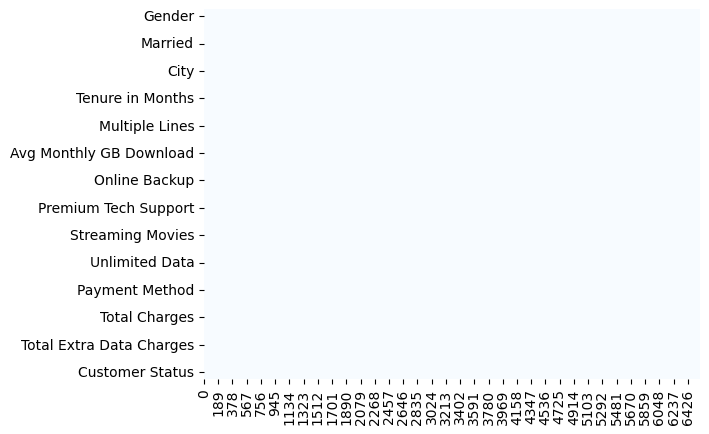

In [476]:
# Find nan value in the table
sns.heatmap(~df.isna().T, cmap='Blues', cbar=False);

In [477]:
df.describe()

,Age,Number of Dependents,Number of Referrals,Tenure in Months,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges
count,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000
mean,46.760510,0.476097,2.020944,34.499772,65.030695,2432.042243,2.080938,7.169525,798.087251
std,16.841362,0.968499,3.024016,23.968734,31.100727,2265.500080,8.125054,25.803163,853.767972
min,19.000000,0.000000,0.000000,1.000000,-10.000000,18.850000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,0.000000,12.000000,35.800000,544.550000,0.000000,0.000000,106.680000
50%,46.000000,0.000000,0.000000,32.000000,71.050000,1563.900000,0.000000,0.000000,472.680000
75%,60.000000,0.000000,3.000000,57.000000,90.400000,4003.000000,0.000000,0.000000,1275.120000
max,80.000000,9.000000,11.000000,72.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000


In [478]:
#I NEED TO WRITE DESCRIPTION ABT DATA ABOVE

In [479]:
city_counts = df.City.value_counts()

In [480]:
# Select city with >5 on count
valid_cities = city_counts[city_counts >= 5].index

In [481]:
df = df[df['City'].isin(valid_cities)]
df

,Gender,Age,Married,Number of Dependents,City,Number of Referrals,Tenure in Months,Offer,Multiple Lines,Internet Type,...,Streaming Music,Unlimited Data,Contract,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Customer Status
0,Female,37,Yes,0,Frazier Park,2,9,None,No,Cable,...,No,Yes,One Year,Credit Card,65.60,593.30,0.00,0,381.51,Stayed
1,Male,46,No,0,Glendale,0,9,None,Yes,Cable,...,Yes,No,Month-to-Month,Credit Card,-4.00,542.40,38.33,10,96.21,Stayed
2,Male,50,No,0,Costa Mesa,0,4,Offer E,No,Fiber Optic,...,No,Yes,Month-to-Month,Bank Withdrawal,73.90,280.85,0.00,0,134.60,Churned
4,Female,75,Yes,0,Camarillo,3,3,None,No,Fiber Optic,...,No,Yes,Month-to-Month,Credit Card,83.90,267.40,0.00,0,22.14,Churned
6,Female,67,Yes,0,Lompoc,1,71,Offer A,No,Fiber Optic,...,Yes,Yes,Two Year,Bank Withdrawal,109.70,7904.25,0.00,0,707.16,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6580,Male,62,Yes,3,Alameda,0,46,None,No,Fiber Optic,...,No,No,Two Year,Credit Card,19.75,856.50,0.00,0,352.82,Stayed
6581,Male,72,Yes,1,Bakersfield,1,47,None,No,Fiber Optic,...,No,No,One Year,Bank Withdrawal,84.95,4018.05,0.00,80,1987.63,Stayed
6582,Female,20,No,0,Los Angeles,0,7,Offer E,No,Fiber Optic,...,Yes,Yes,One Year,Credit Card,94.05,633.45,0.00,0,255.43,Stayed
6584,Female,36,No,0,Fallbrook,0,4,None,No,Fiber Optic,...,No,No,Month-to-Month,Bank Withdrawal,20.95,85.50,0.00,0,8.04,Churned


## Target 'Customer Status' -> (Churned/Stayed)

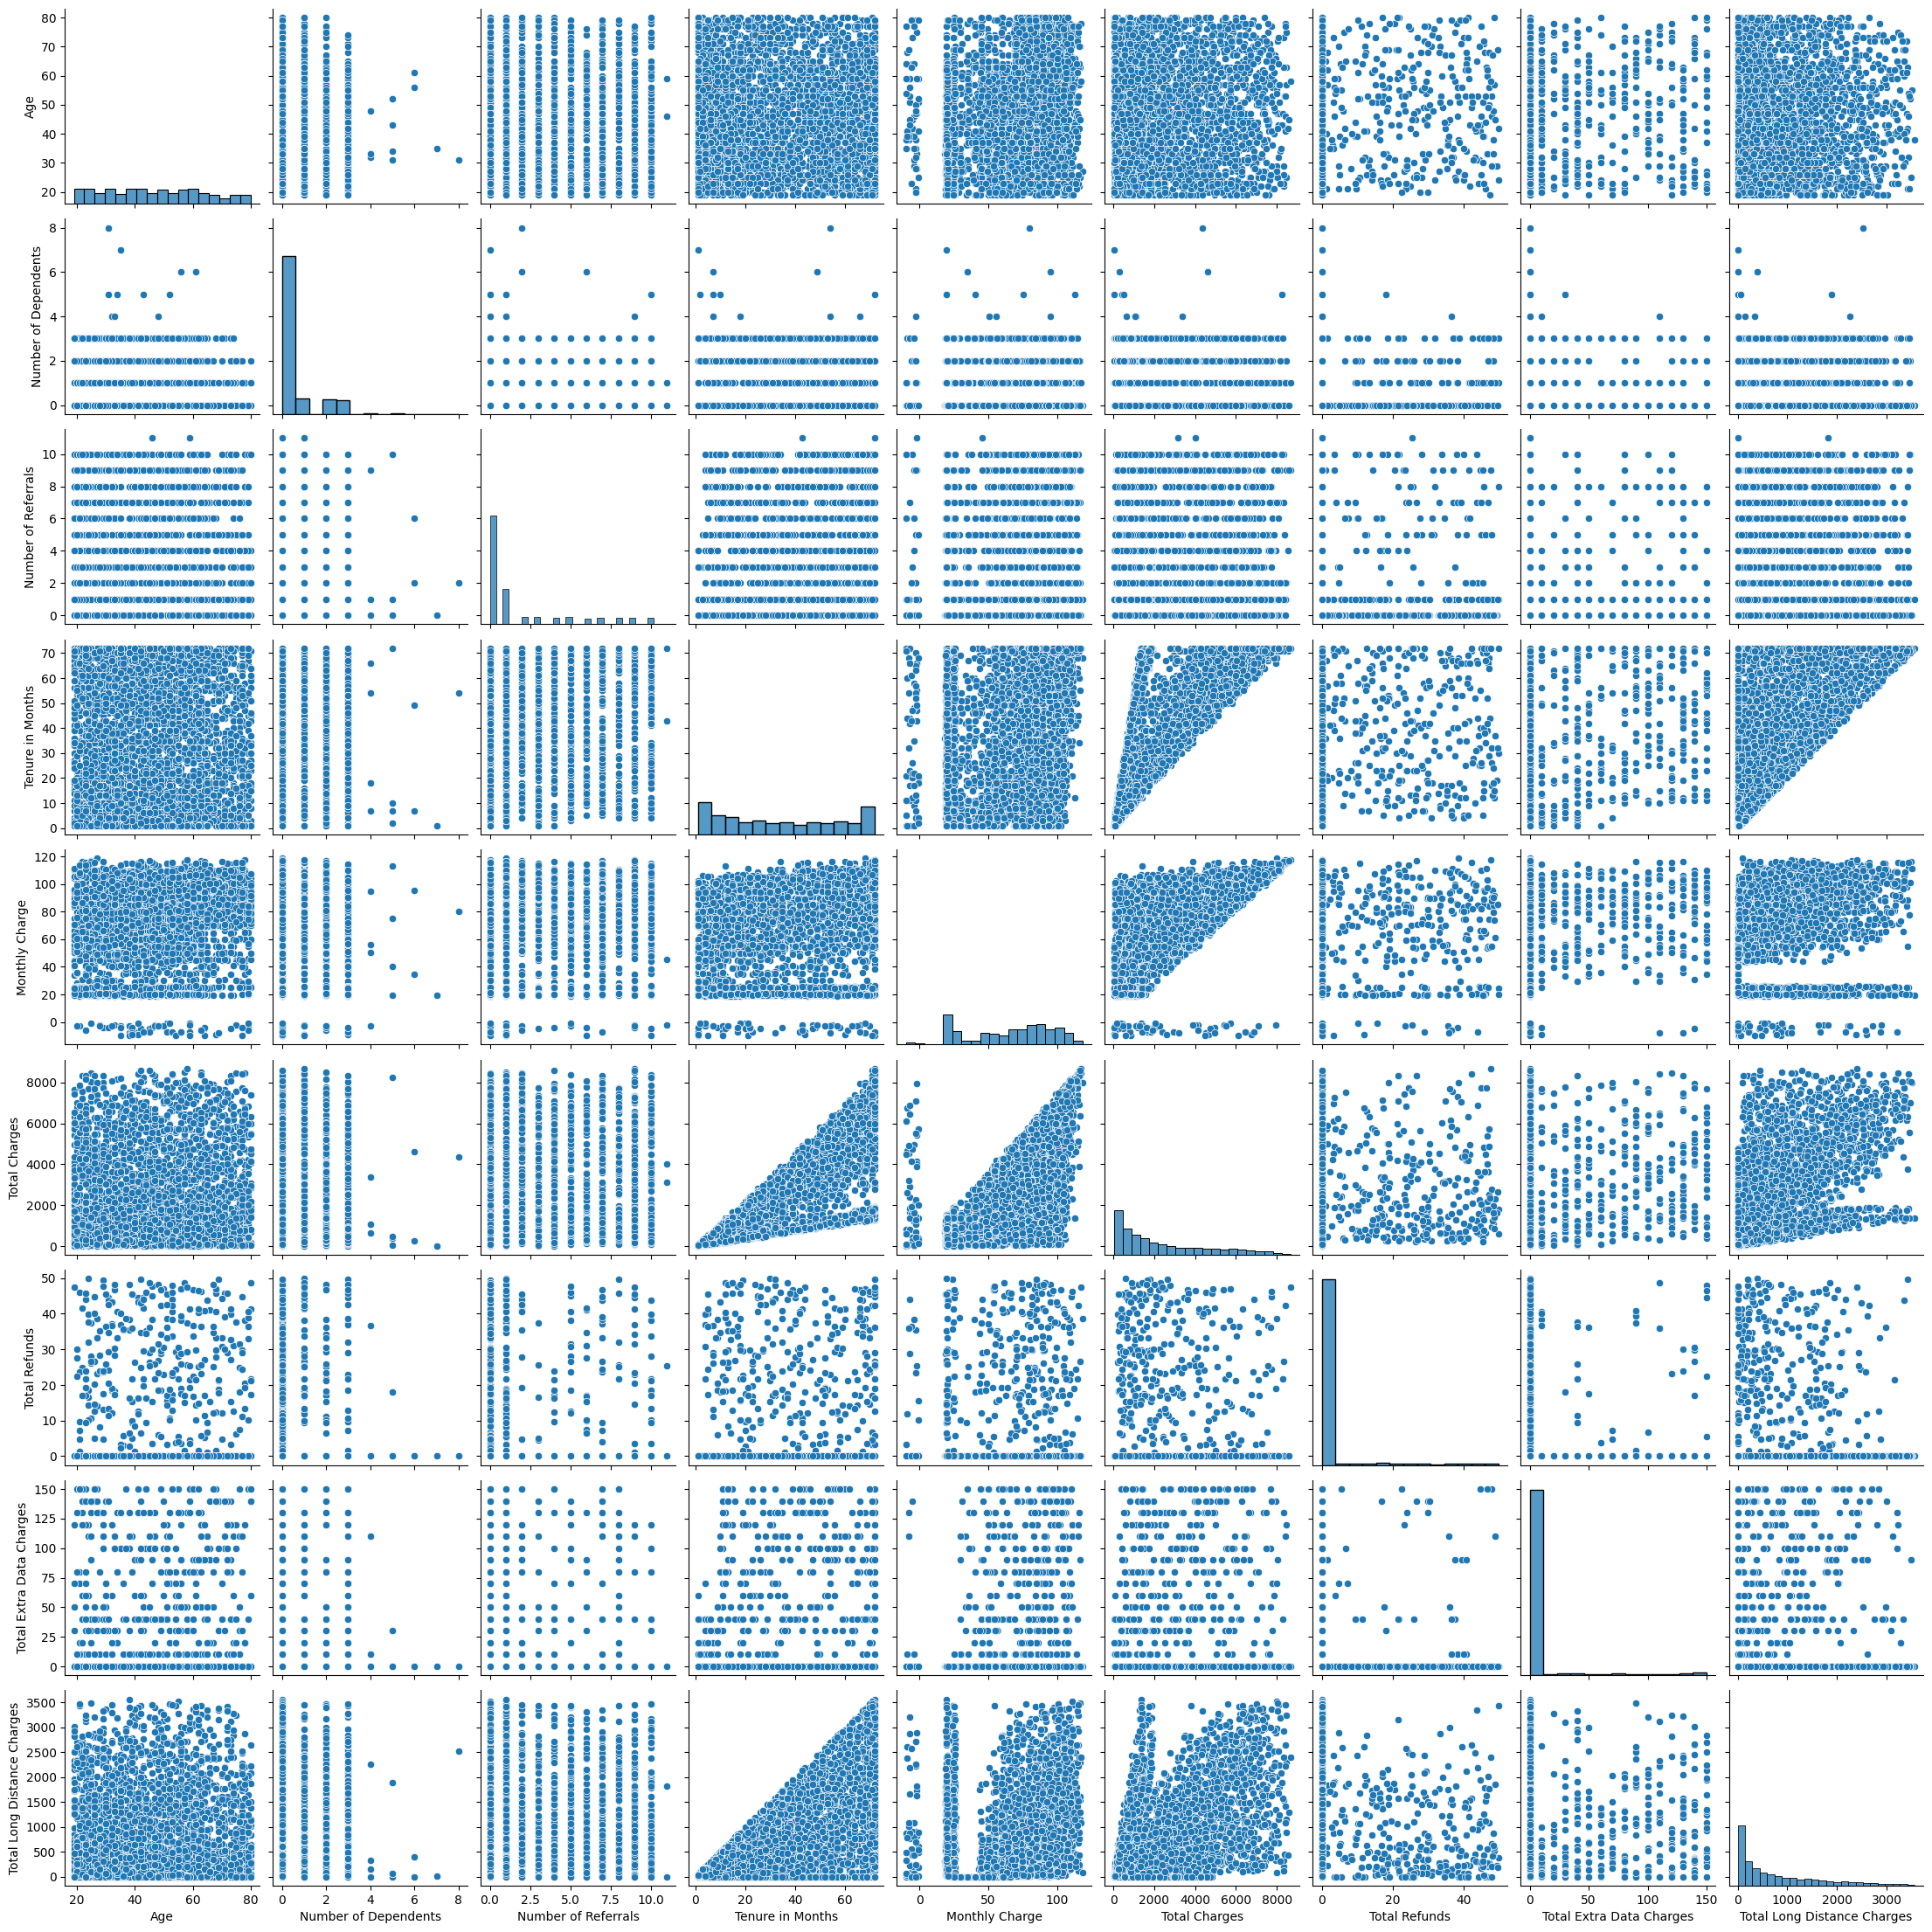

In [482]:
sns.pairplot(df)

In [483]:
X = df.drop(columns=['Customer Status'])
y = df['Customer Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

## Processing

In [484]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [485]:
num_pipe = Pipeline([
    ('scaler', MinMaxScaler())
])

cat_pipe = Pipeline([
    ('encoder', OneHotEncoder())
])

In [486]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe, ['Age', 'Number of Dependents', 'Number of Referrals','Tenure in Months','Avg Monthly GB Download','Monthly Charge','Total Charges','Total Refunds','Total Extra Data Charges','Total Long Distance Charges']),
    ('categoric', cat_pipe, ['Gender', 'Married','City', 'Offer','Multiple Lines' ,'Internet Type','Online Security','Online Backup','Device Protection Plan','Premium Tech Support'
,'Streaming TV' ,'Streaming Movies','Streaming Music','Unlimited Data','Contract' ,'Payment Method'])
])

### Tuning dan Cross Validation

In [487]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [488]:
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestClassifier())
])

In [489]:
params = {
    'algo__max_depth': [20, 50, 80],
    'algo__max_features': [0.3, 0.6, 0.8],
    'algo__min_samples_leaf': [1, 5, 10]
}

In [490]:
model = GridSearchCV(pipeline, params, cv=7)

In [491]:
model = model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 718, in score
    Xt = transform.transform(Xt)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py", line 800, in transform
    Xs = self._fit_transform(
  File "/usr/local/lib/python3.10/dist-pa

In [492]:
model.best_params_

{'algo__max_depth': 20, 'algo__max_features': 0.3, 'algo__min_samples_leaf': 1}

In [493]:
model.score(X_train, y_train)

0.9996359665089188

In [494]:
model.score(X_test, y_test)

0.8558951965065502

### Validasi

In [497]:
pred = joined_rows.drop('Customer Status', axis=1)
pred

,Gender,Age,Married,Number of Dependents,City,Number of Referrals,Tenure in Months,Offer,Multiple Lines,Internet Type,...,Streaming Movies,Streaming Music,Unlimited Data,Contract,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges
Customer ID,,,,,,,,,,,,,,,,,,,,,
0021-IKXGC,Female,72,No,0,San Marcos,0,1,Offer E,Yes,Fiber Optic,...,No,No,Yes,One Year,Bank Withdrawal,72.10,72.10,0.0,0,7.77
0030-FNXPP,Female,22,No,0,Keeler,0,3,None,No,Fiber Optic,...,No,No,No,Month-to-Month,Credit Card,19.85,57.20,0.0,0,9.36
0082-LDZUE,Male,54,No,0,Calistoga,0,1,Offer E,No,DSL,...,No,No,Yes,Month-to-Month,Credit Card,44.30,44.30,0.0,0,42.95
0139-IVFJG,Female,19,Yes,0,Temecula,10,2,None,No,Fiber Optic,...,No,No,Yes,Month-to-Month,Bank Withdrawal,90.35,190.50,0.0,0,9.30
0178-CIIKR,Female,60,No,0,Crows Landing,0,3,None,No,Fiber Optic,...,No,No,No,Month-to-Month,Credit Card,19.95,58.00,0.0,0,8.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9840-EFJQB,Female,43,No,0,Sylmar,0,1,None,No,Fiber Optic,...,No,No,Yes,Month-to-Month,Bank Withdrawal,74.35,74.35,0.0,0,24.41
9895-VFOXH,Female,19,No,0,Scotia,0,1,None,No,No Internet Type,...,No,Yes,No,Month-to-Month,Credit Card,24.40,24.40,0.0,10,0.00
9962-BFPDU,Female,61,Yes,3,Kenwood,3,1,None,No,Fiber Optic,...,No,No,No,Month-to-Month,Credit Card,20.05,20.05,0.0,0,16.02


In [499]:
city_counts = pred.City.value_counts()
valid_cities = city_counts[city_counts >= 5].index
pred = pred[pred['City'].isin(valid_cities)]
pred

,Gender,Age,Married,Number of Dependents,City,Number of Referrals,Tenure in Months,Offer,Multiple Lines,Internet Type,...,Streaming Movies,Streaming Music,Unlimited Data,Contract,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges
Customer ID,,,,,,,,,,,,,,,,,,,,,
0674-EYYZV,Female,41,No,0,Los Angeles,0,1,None,No,DSL,...,No,No,Yes,Month-to-Month,Bank Withdrawal,54.65,54.65,0.0,0,36.33
0929-HYQEW,Male,20,No,0,Oakland,0,3,None,No,DSL,...,No,No,Yes,Month-to-Month,Credit Card,50.15,160.85,0.0,0,52.26
1064-FBXNK,Male,55,Yes,1,Sacramento,5,1,None,No,Fiber Optic,...,No,No,No,One Year,Credit Card,19.85,19.85,0.0,0,47.46
1156-ZFYDO,Female,57,No,0,Glendale,0,1,None,No,Fiber Optic,...,No,No,No,Month-to-Month,Bank Withdrawal,19.75,19.75,0.0,0,37.62
1640-PLFMP,Female,20,No,0,Los Angeles,0,1,None,No,Fiber Optic,...,No,No,No,Month-to-Month,Bank Withdrawal,70.25,70.25,0.0,10,10.05
1763-WQFUK,Male,45,No,0,Riverside,0,3,None,No,DSL,...,No,No,Yes,Month-to-Month,Mailed Check,50.50,147.75,0.0,0,79.14
1866-OBPNR,Male,28,Yes,1,Sacramento,5,1,None,No,Fiber Optic,...,No,No,Yes,Month-to-Month,Credit Card,74.60,74.60,0.0,0,42.99
1941-HOSAM,Male,20,Yes,3,San Diego,1,1,None,No,Fiber Optic,...,Yes,Yes,Yes,Month-to-Month,Bank Withdrawal,90.10,90.10,0.0,0,24.33
2303-PJYHN,Female,27,Yes,0,Los Angeles,8,2,Offer E,No,Fiber Optic,...,No,No,No,Month-to-Month,Bank Withdrawal,19.85,52.00,0.0,0,72.10


In [500]:
model.predict(pred)

array(['Churned', 'Churned', 'Stayed', 'Churned', 'Churned', 'Churned',
       'Churned', 'Churned', 'Churned', 'Stayed', 'Churned', 'Churned',
       'Stayed', 'Churned', 'Churned', 'Churned', 'Stayed', 'Churned',
       'Churned', 'Churned', 'Churned', 'Stayed', 'Stayed', 'Churned',
       'Churned', 'Churned', 'Stayed', 'Churned', 'Churned', 'Churned',
       'Churned', 'Churned', 'Churned', 'Churned', 'Churned', 'Churned',
       'Churned', 'Churned', 'Churned', 'Churned', 'Churned', 'Churned',
       'Churned', 'Churned', 'Churned', 'Churned', 'Churned', 'Stayed',
       'Churned', 'Churned', 'Churned', 'Churned', 'Churned', 'Churned'],
      dtype=object)

In [507]:
pred['Pred'] = ['Churned', 'Churned', 'Stayed', 'Churned', 'Churned', 'Churned',
       'Churned', 'Churned', 'Churned', 'Stayed', 'Churned', 'Churned',
       'Stayed', 'Churned', 'Churned', 'Churned', 'Stayed', 'Churned',
       'Churned', 'Churned', 'Churned', 'Stayed', 'Stayed', 'Churned',
       'Churned', 'Churned', 'Stayed', 'Churned', 'Churned', 'Churned',
       'Churned', 'Churned', 'Churned', 'Churned', 'Churned', 'Churned',
       'Churned', 'Churned', 'Churned', 'Churned', 'Churned', 'Churned',
       'Churned', 'Churned', 'Churned', 'Churned', 'Churned', 'Stayed',
       'Churned', 'Churned', 'Churned', 'Churned', 'Churned', 'Churned']
pred

<ipython-input-507-bd627a9910c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred['Pred'] = ['Churned', 'Churned', 'Stayed', 'Churned', 'Churned', 'Churned',


,Gender,Age,Married,Number of Dependents,City,Number of Referrals,Tenure in Months,Offer,Multiple Lines,Internet Type,...,Streaming Music,Unlimited Data,Contract,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Pred
Customer ID,,,,,,,,,,,,,,,,,,,,,
0674-EYYZV,Female,41,No,0,Los Angeles,0,1,None,No,DSL,...,No,Yes,Month-to-Month,Bank Withdrawal,54.65,54.65,0.0,0,36.33,Churned
0929-HYQEW,Male,20,No,0,Oakland,0,3,None,No,DSL,...,No,Yes,Month-to-Month,Credit Card,50.15,160.85,0.0,0,52.26,Churned
1064-FBXNK,Male,55,Yes,1,Sacramento,5,1,None,No,Fiber Optic,...,No,No,One Year,Credit Card,19.85,19.85,0.0,0,47.46,Stayed
1156-ZFYDO,Female,57,No,0,Glendale,0,1,None,No,Fiber Optic,...,No,No,Month-to-Month,Bank Withdrawal,19.75,19.75,0.0,0,37.62,Churned
1640-PLFMP,Female,20,No,0,Los Angeles,0,1,None,No,Fiber Optic,...,No,No,Month-to-Month,Bank Withdrawal,70.25,70.25,0.0,10,10.05,Churned
1763-WQFUK,Male,45,No,0,Riverside,0,3,None,No,DSL,...,No,Yes,Month-to-Month,Mailed Check,50.50,147.75,0.0,0,79.14,Churned
1866-OBPNR,Male,28,Yes,1,Sacramento,5,1,None,No,Fiber Optic,...,No,Yes,Month-to-Month,Credit Card,74.60,74.60,0.0,0,42.99,Churned
1941-HOSAM,Male,20,Yes,3,San Diego,1,1,None,No,Fiber Optic,...,Yes,Yes,Month-to-Month,Bank Withdrawal,90.10,90.10,0.0,0,24.33,Churned
2303-PJYHN,Female,27,Yes,0,Los Angeles,8,2,Offer E,No,Fiber Optic,...,No,No,Month-to-Month,Bank Withdrawal,19.85,52.00,0.0,0,72.10,Churned


## Save Model

In [509]:
import pickle

In [510]:
#storung model untuk bisa dishare
pickle.dump(model, open('model_customerpred.pkl','wb')) #WB supaya picle tau ini mode write

#WB = membaca , RB=menyimpan